## Imperative vs. declarative visualization

|Imperative|Declarative|
|----------|-----------|
|Specify how something should be done. | Specify what should be done.|
|Specification and execution intertwined. | Separates specification from execution. |
E.g. "Put a red circle here.  Put a blue circle there.| E.g. "Map `<a>` to a position and `<b>` to a color."|

Matplotlib is an _imperative_ visualization API with minimal support for **interactivity**. 

_Declarative_ visualization describes plots in terms of **data** and **relationships**, rather than incidental details.

*Note*: much of this part of the tutorial is adapted from https://www.youtube.com/watch?v=ms29ZPUKxbU

In [1]:
from vega_datasets import data

iris = data.iris()

iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Matplotlib examples

### First, grouping...

Let's group by the species column in the dataframe and color the points by their species.

![Grouping in Matplotlib](https://raw.githubusercontent.com/UWSEDS/LectureNotes/master/13_Viz_with_Altair/grouping_in_matplotlib.png)

### Second, faceting...

Instead of plotting all of the species on the same plot, let's make separate plots for each species.

![Grouping in Matplotlib](https://raw.githubusercontent.com/UWSEDS/LectureNotes/master/13_Viz_with_Altair/faceting_in_matplotlib.png)


### Declarative visualization, by example

Let's show how this would be accomplished in a declarative language like Altair / Vega.  First, a single plot showing the species as colors.

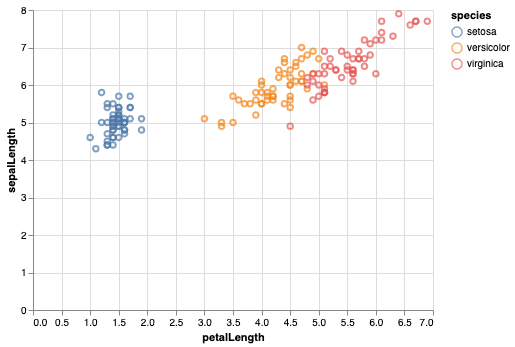

In [8]:
import altair as alt

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='sepalLength',
    color='species'
)

#### Now faceting...

Show the species as facets using different plots.

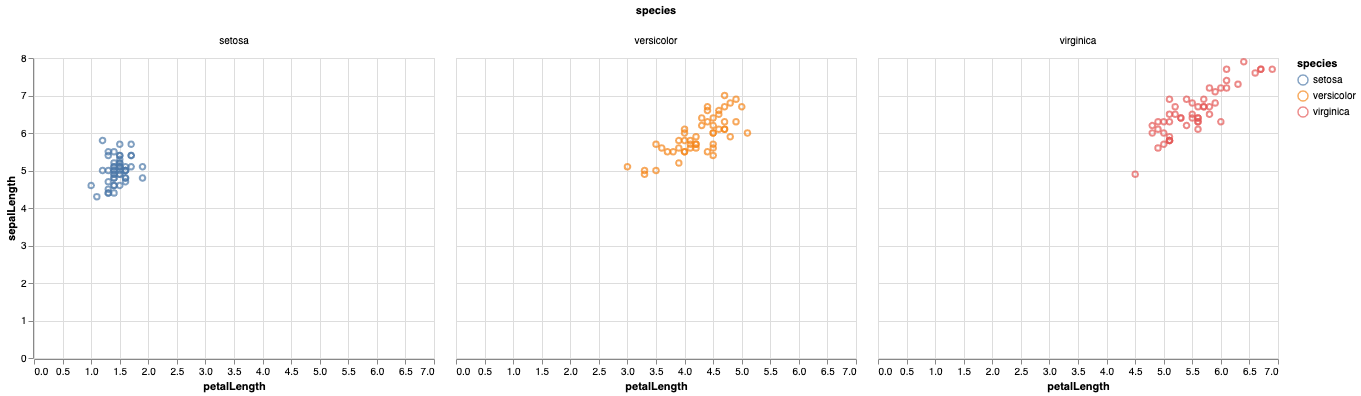

In [9]:
import altair as alt

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='sepalLength',
    color='species',
    column='species'
)

### And interactivity?

Yup. That's easy with the `.interactive()` method on the Chart object.  **Notice how the column charts are linked through their interactivity.**

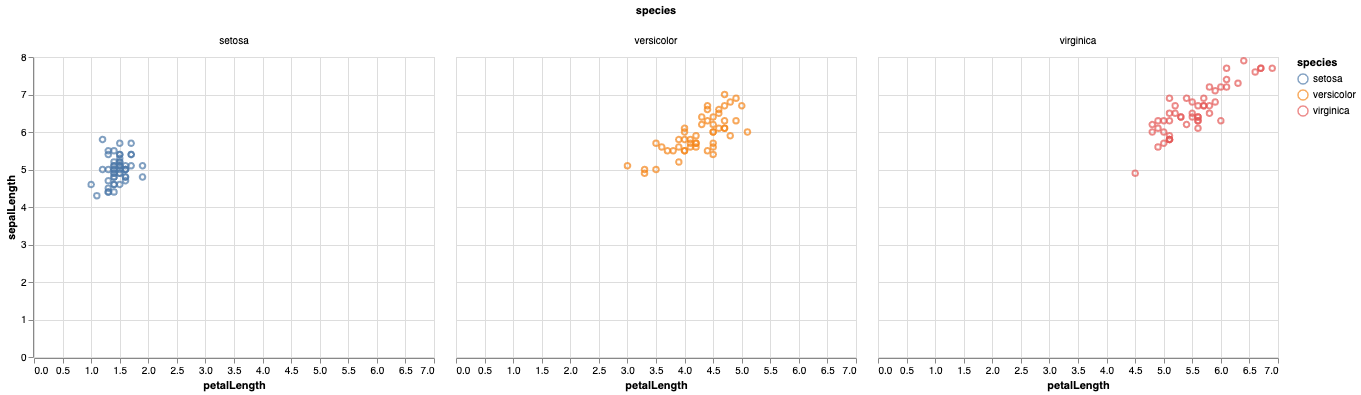

In [10]:
import altair as alt

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='sepalLength',
    color='species',
    column='species'
).interactive()

## Introduction to Altair

Much of this tutorial is adapted from the Altair user guide: https://altair-viz.github.io

The key idea is that you are declaring links between data columns and visual encoding channels, such as the x-axis, y-axis, color, etc. The rest of the plot details are handled automatically. Building on this declarative plotting idea, a surprising range of simple to sophisticated plots and visualizations can be created using a relatively concise grammar.

#### Setting up the environment
At the command line, create a new environment and install altair the vega_datasets and let's use jupyterlab which is the preferred notebook environment for Altair.

```$ conda create -n altair python=3.7.4 altair vega_datasets jupyterlab```

Change to the new environment and start the jupyterlab server:

```$ conda activate altair```

```$ jupyter lab```

Import the necessary libraries to get started...

In [11]:
import altair as alt
import numpy as np
import pandas as pd

Let's make sure the visualization is working in jupyter lab by using a canned dataset

In [12]:
iris = data.iris()

iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


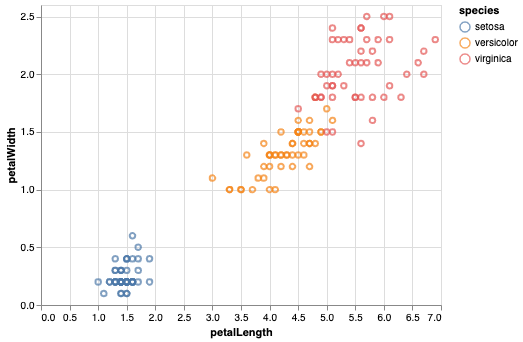

In [14]:
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).interactive()

---

Let's make a super a super simple data frame and create our first visualization.

In [15]:
df = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
df.head()

,a,b
0,C,2
1,C,7
2,C,4
3,D,1
4,D,2


The Chart object is the basic object of Altair.  If we pass it our dataframe ``df`` we can show a point.  It doesn't mean anything, but we can do it anyway...

In [16]:
alt.Chart(df).mark_point()

With factors like column A, we can plot them on an axis, e.g. the x axis.  Again, doesn't mean much.

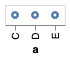

In [17]:
alt.Chart(df).mark_point().encode(
    x='a',
)

_BUT_ with when we encode both axes, we can get some sort of a sensible plot.

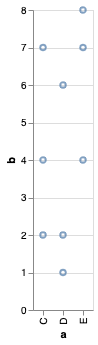

In [18]:
alt.Chart(df).mark_point().encode(
    x='a',
    y='b'
)

The type of the data in the "b" column is again automatically-inferred by altair, and this time is treated as a quantitative type (i.e. real-valued). Additionally, we see that grid lines and appropriate axis titles are automatically added as well.

#### Aggregation and other transformations

To allow for more flexibility in how data are visualized, Altair has a built-in syntax for aggregation of data. For example, we can compute the average of all values by specifying this aggregate within the column identifier:

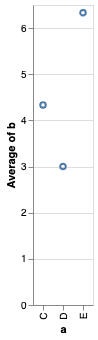

In [19]:
alt.Chart(df).mark_point().encode(
    x='a',
    y='average(b)'
)

Typically, aggregated values are not represented by point markings, but by bar markings. We can do this by replacing ``mark_point()`` with ``mark_bar()``:

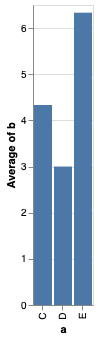

In [20]:
alt.Chart(df).mark_bar().encode(
    x='a',
    y='average(b)'
)

Because the categorical feature is mapped to the x-axis, the result is a vertical bar chart. To get a horizontal bar chart, all we need is to swap the `x` and `y` keywords:

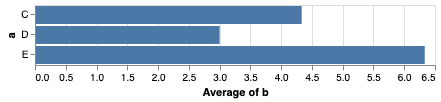

In [21]:
alt.Chart(df).mark_bar().encode(
    y='a',
    x='average(b)'
)

----

*Side note:* Under the hood, the Altair represents the plot as a JSON object this is because it passes the visualization declarations to a tool called Vega.  If you want to examine the JSON, you can, e.g.

In [22]:
chart = alt.Chart(df).mark_bar().encode(
    x='a',
    y='average(b)',
)
print(chart.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.4.0.json",
  "config": {
    "mark": {
      "tooltip": null
    },
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "name": "data-347f1284ea3247c0f55cb966abbdd2d8"
  },
  "datasets": {
    "data-347f1284ea3247c0f55cb966abbdd2d8": [
      {
        "a": "C",
        "b": 2
      },
      {
        "a": "C",
        "b": 7
      },
      {
        "a": "C",
        "b": 4
      },
      {
        "a": "D",
        "b": 1
      },
      {
        "a": "D",
        "b": 2
      },
      {
        "a": "D",
        "b": 6
      },
      {
        "a": "E",
        "b": 8
      },
      {
        "a": "E",
        "b": 4
      },
      {
        "a": "E",
        "b": 7
      }
    ]
  },
  "encoding": {
    "x": {
      "field": "a",
      "type": "nominal"
    },
    "y": {
      "aggregate": "average",
      "field": "b",
      "type": "quantitative"
    }
  },
  "mark": "bar"
}


----

Back to customizing your charts...

Let's change the color of the bars and fix up the titling.

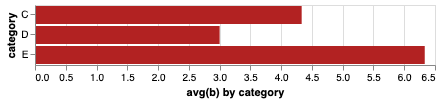

In [23]:
alt.Chart(df).mark_bar(color='firebrick').encode(
    alt.Y('a', title='category'),
    alt.X('average(b)', title='avg(b) by category')
)

One really nice thing about Vega and Altair is that once you have a visualization that you want to persist outside of a notebook, you can save it to a web page (HTML).

In [24]:
chart = alt.Chart(df).mark_bar(color='firebrick').encode(
    alt.Y('a', title='category'),
    alt.X('average(b)', title='avg(b) by category')
)
chart.save('chart.html')

Even cooler, you can export the plot to the online Vega editor by using the options on the top right in the three dot button.  Then in the editor you can share the visualization using only a URL (if the data are small enough).  **Demo**

-----

#### Let's make a time series plot using dates and some random data

In [25]:
rand = np.random.RandomState(0)

df = pd.DataFrame({'value': rand.randn(100).cumsum()},
                    index=pd.date_range('2018', freq='D', periods=100))
df.head()

,value
2018-01-01,1.764052
2018-01-02,2.164210
2018-01-03,3.142948
2018-01-04,5.383841
2018-01-05,7.251399


If you would like the index to be available to the chart, you can explicitly turn it into a column using the reset_index() method of Pandas dataframes:

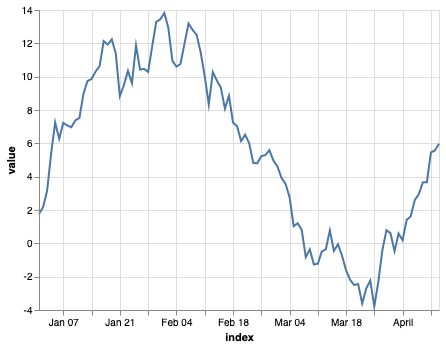

In [26]:
alt.Chart(df.reset_index()).mark_line().encode(
    x='index:T',
    y='value:Q'
)

-----

#### Encodings

An _encoding_ in Altair is how you map properties of the data to visual properties in order to effectively communicate information. Encodings are most often expressed through the ```Chart.encode()``` method.



But first, let's look at a new dataset: cars.  Like `iris` it is heavily used for demos in R and Python.  The data set we are using here contains information about cars, their mileage, horsepower, acceleration, cylinders, country of origin.  

In [27]:
cars = data.cars()

cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


A basic visualization that we have already seen as the test of does Altair work.

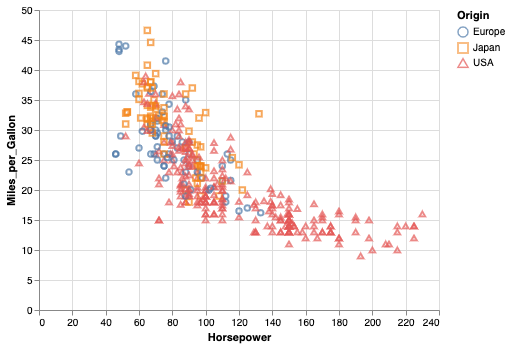

In [29]:
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    shape='Origin'
).interactive()

#### A complete list of the encodings is available here:

https://altair-viz.github.io/user_guide/encoding.html#encoding-channels

Like the iris dataset it is Let's plot the horsepower against the miles per gallon and color code using three different approaches the number of cylinders.

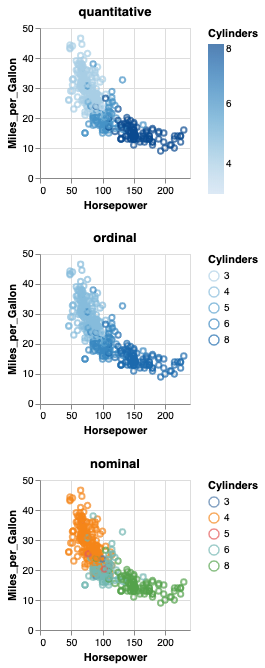

In [30]:
base = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
).properties(
    width=150,
    height=150
)

alt.vconcat(
   base.encode(color='Cylinders:Q').properties(title='quantitative'),
   base.encode(color='Cylinders:O').properties(title='ordinal'),
   base.encode(color='Cylinders:N').properties(title='nominal'),
)

#### The different types are explained below

| Data Type | Shorthand Code | Description |
|-----------|----------------|-------------|
quantitative | Q | a continuous real-valued quantity
ordinal | O | a discrete ordered quantity
nominal | N | a discrete unordered category
temporal | T | a time or date value

The type used for the data will affect the scales used and the characteristics of the mark. For example, here is the difference between a quantitative and ordinal scale for an column that contains integers specifying a year:

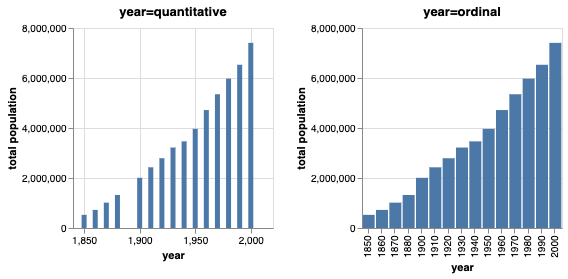

In [31]:
pop = data.population.url

base = alt.Chart(pop).mark_bar().encode(
    alt.Y('mean(people):Q', title='total population')
).properties(
    width=200,
    height=200
)

alt.hconcat(
    base.encode(x='year:Q').properties(title='year=quantitative'),
    base.encode(x='year:O').properties(title='year=ordinal')
)

#### Altair is knowledgeable about database-style grouping and aggregation

For example, building a histogram from a one-dimensional dataset involves splitting data based on the bin it falls in, aggregating the results within each bin using a count of the data, and then combining the results into a final figure.

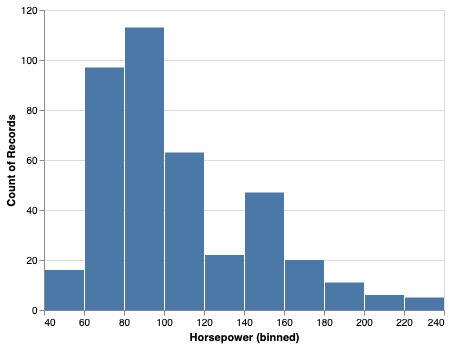

In [32]:
alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower', bin=True),
    y='count()'
    # could also use alt.Y(aggregate='count', type='quantitative')
)

Similarly, we can create a two-dimensional histogram using, for example, the size of points to indicate counts within the grid (sometimes called a “Bubble Plot”):

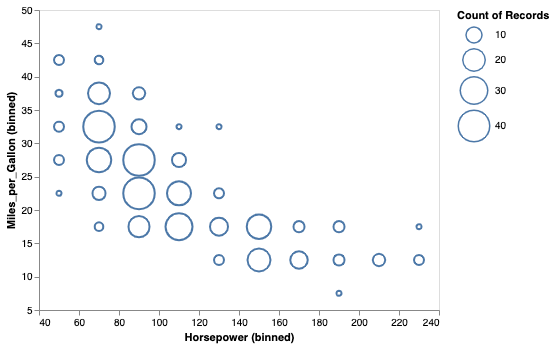

In [33]:
alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower', bin=True),
    alt.Y('Miles_per_Gallon', bin=True),
    size='count()',
)

There is no need, however, to limit aggregations to counts alone. For example, we could similarly create a plot where the color of each point represents the mean of a third quantity, such as acceleration:

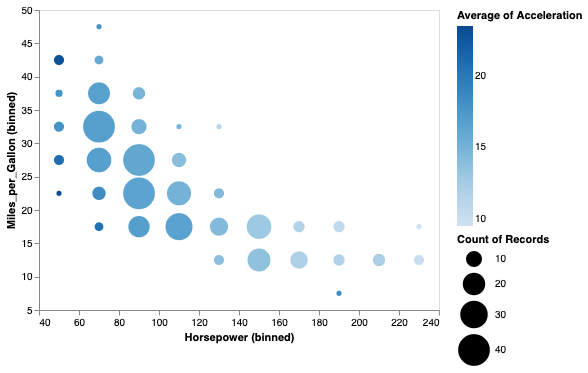

In [34]:
alt.Chart(cars).mark_circle().encode(
    alt.X('Horsepower', bin=True),
    alt.Y('Miles_per_Gallon', bin=True),
    size='count()',
    color='average(Acceleration):Q'
)

#### There are many aggregate functions that you can use

Here is a table adapted from the Altair documention showing them.

|Aggregate|Description|Example|
|---------|-----------|-------|
|argmin|An input data object containing the minimum field value.|N/A|
|argmax|An input data object containing the maximum field value.|N/A|
|average|The mean (average) field value. Identical to mean.|Line Chart with Layered Aggregates|
|count|The total count of data objects in the group.|Simple Heatmap|
|distinct|The count of distinct field values.|N/A|
|max|The maximum field value.|Box Plot with Min/Max Whiskers|
|mean|The mean (average) field value.|Interactive Scatter Plot and Linked Layered Histogram|
|median|The median field value|Box Plot with Min/Max Whiskers|
|min|The minimum field value.|Box Plot with Min/Max Whiskers|
|missing|The count of null or undefined field values.|N/A|
|q1|The lower quartile boundary of values.|Box Plot with Min/Max Whiskers|
|q3|The upper quartile boundary of values.|Box Plot with Min/Max Whiskers|
|ci0|The lower boundary of the bootstrapped 95% confidence interval of the mean.|Sorted Error Bars showing Confidence Interval|
|ci1|The upper boundary of the bootstrapped 95% confidence interval of the mean.|Sorted Error Bars showing Confidence Interval|
|stderr|The standard error of the field values.|N/A|
|stdev|The sample standard deviation of field values.|N/A|
|stdevp|The population standard deviation of field values.|N/A|
|sum|The sum of field values.|Streamgraph|
|valid|The count of field values that are not null or undefined.|N/A|
|values|??|N/A|
|variance|The sample variance of field values.|N/A|
|variancep|The population variance of field values.|N/A|

------


#### Ordering marks in plots and legends

The order option and Order channel can sort how marks are drawn on the chart.

For stacked marks, this controls the order of components of the stack. Here, the elements of each bar are sorted alphabetically by the name of the nominal data in the color channel.



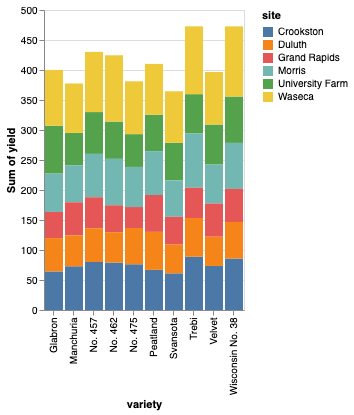

In [36]:
barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order("site", sort="ascending")
)

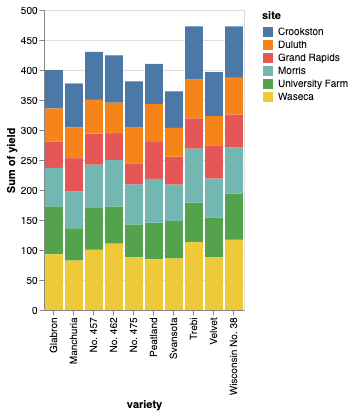

In [37]:
alt.Chart(barley).mark_bar().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order("site", sort="descending")
)

This concept applies also to other chart types like stacked area charts:

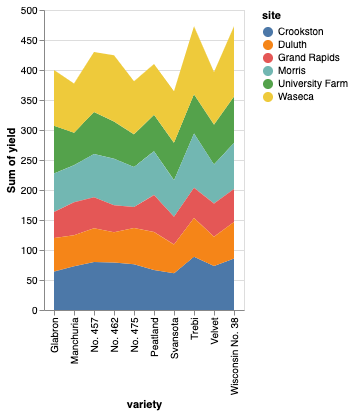

In [38]:
alt.Chart(barley).mark_area().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order("site", sort="ascending")
)

For line marks, the ```order``` channel encodes the order in which data points are connected. This can be useful for creating a scatterplot that draws lines between the dots using a different field than the `x` and `y` axes.

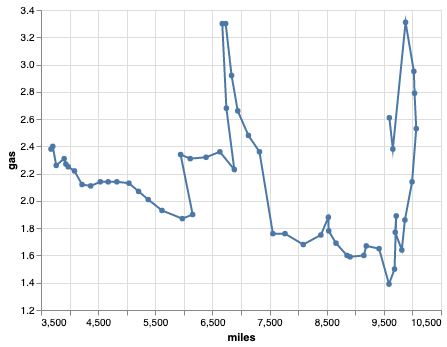

In [39]:
driving = data.driving()

alt.Chart(driving).mark_line(point=True).encode(
    alt.X('miles', scale=alt.Scale(zero=False)),
    alt.Y('gas', scale=alt.Scale(zero=False)),
    order='year'
)

### We can also apply a color to the ordering.  How would you do this?

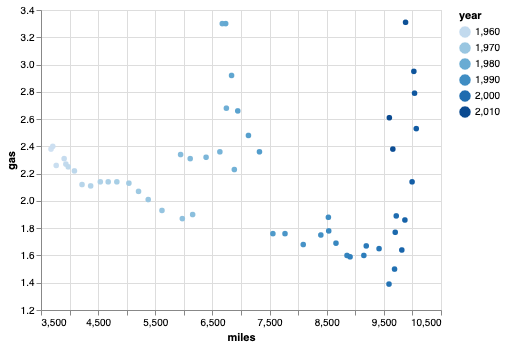

In [40]:
driving = data.driving()

alt.Chart(driving).mark_line(point=True).encode(
    alt.X('miles', scale=alt.Scale(zero=False)),
    alt.Y('gas', scale=alt.Scale(zero=False)),
    order='year',
    color='year'
)

### Multiple plots....

You can have multiple plots on a line by using the `|` operator.  Here is an example showing how ordering impacts the readability of plots and uses the `'` operator:

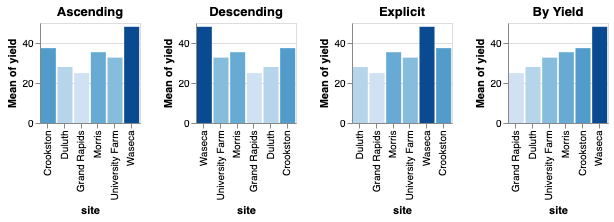

In [41]:
barley = data.barley()

base = alt.Chart(barley).mark_bar().encode(
    y='mean(yield):Q',
    color=alt.Color('mean(yield):Q', legend=None)
).properties(width=100, height=100)

# Sort x in ascending order
ascending = base.encode(
    alt.X(field='site', type='nominal', sort='ascending')
).properties(
    title='Ascending'
)

# Sort x in descending order
descending = base.encode(
    alt.X(field='site', type='nominal', sort='descending')
).properties(
    title='Descending'
)

# Sort x in an explicitly-specified order
explicit = base.encode(
    alt.X(field='site', type='nominal',
          sort=['Duluth', 'Grand Rapids', 'Morris',
                'University Farm', 'Waseca', 'Crookston'])
).properties(
    title='Explicit'
)

# Sort according to another field
sortfield = base.encode(
    alt.X(field='site', type='nominal',
          sort=alt.EncodingSortField(field='yield', op='mean'))
).properties(
    title='By Yield'
)

ascending | descending | explicit | sortfield

-----

#### Making a box plot

Take 5 minutes and figure out how to make a box plot out of these data:

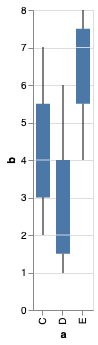

In [43]:
df = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
alt.Chart(df).mark_boxplot().encode(x='a',y='b')

----

#### Interactivity!

Here we get to the bees knees: making your plots interactive easily with Altair.

First let's start with the uninteresting HP vs MPG plot.

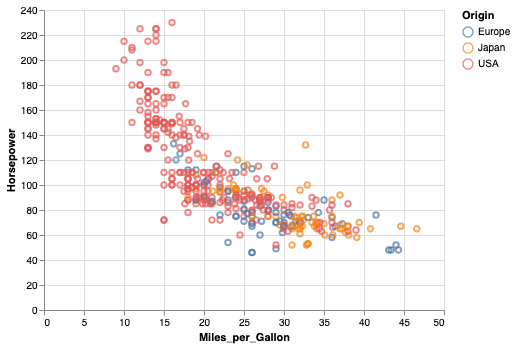

In [44]:
cars = data.cars.url

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N'
)

Notice... Not interactive.  Let's make it possible to select some points.

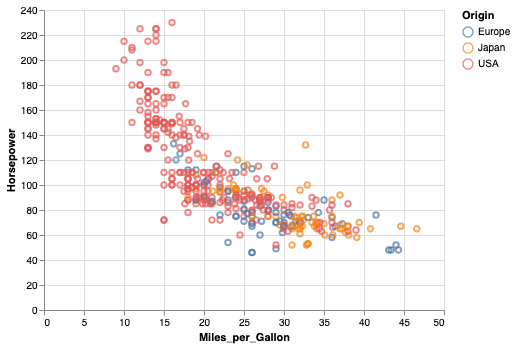

In [45]:
brush = alt.selection_interval()  # selection of type "interval"


alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N'
).add_selection(
    brush
)

WOW.  That is completely useless.  Let's make the selection do something more interesting.

In this case, we select an interval and color everything else light grey.

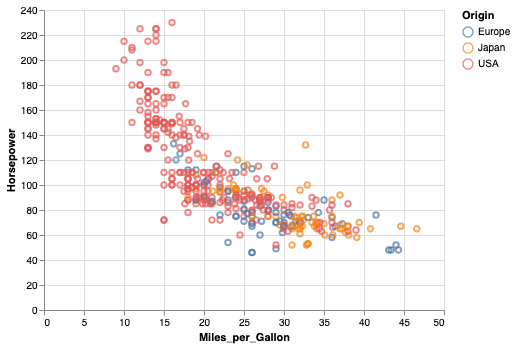

In [46]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

_Better_ but still only highlighting.  Let's show how two charts can be used in this way to show interesting relationships between variables.

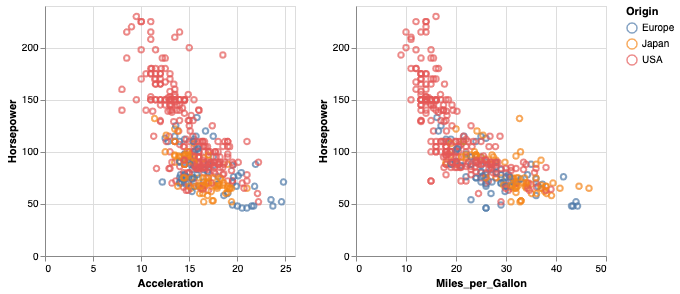

In [47]:
chart = alt.Chart(cars).mark_point().encode(
    y='Horsepower:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).properties(
    width=250,
    height=250
).add_selection(
    brush
)

chart.encode(x='Acceleration:Q') | chart.encode(x='Miles_per_Gallon:Q')

*NEATO!*


Instead of selection an `x` and `y` range, let's just enable selecting on the `x` axis.

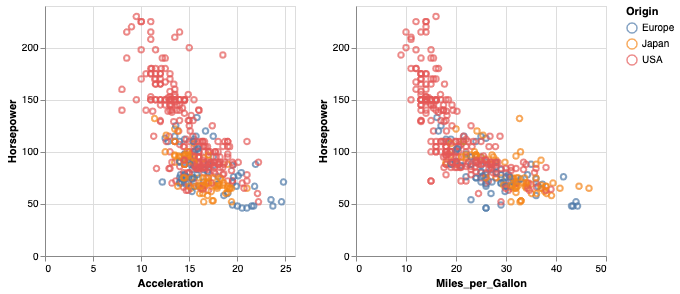

In [48]:
brush = alt.selection_interval(encodings=['x'])

chart = alt.Chart(cars).mark_point().encode(
    y='Horsepower:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).properties(
    width=250,
    height=250
).add_selection(
    brush
)

chart.encode(x='Acceleration:Q') | chart.encode(x='Miles_per_Gallon:Q')

**Cool** but I want to investigate a single point and show a tool tip revealing information about that specific point.  Example, find out about outliers.

For any but the simplest selections, the user needs to think about exactly what is targeted by the selection, and this can be controlled with either the fields or encodings arguments. These control what data properties are used to determine which points are part of the selection.

For example, here we create a small chart that acts as an interactive legend, by targeting the Origin field using fields=['Origin']. Clicking on points in the upper-left plot (the legend) will propagate a selection for all points with a matching Origin.

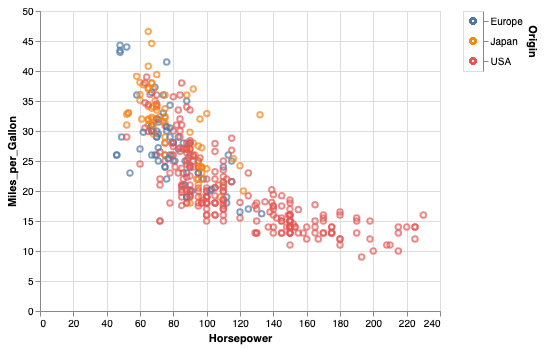

In [49]:
selection = alt.selection_multi(fields=['Origin'])
color = alt.condition(selection,
                      alt.Color('Origin:N', legend=None),
                      alt.value('lightgray'))

scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
)

legend = alt.Chart(cars).mark_point().encode(
    y=alt.Y('Origin:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)

scatter | legend

**Now we are getting something useful** 

Let's add a dropdown box to select the country.

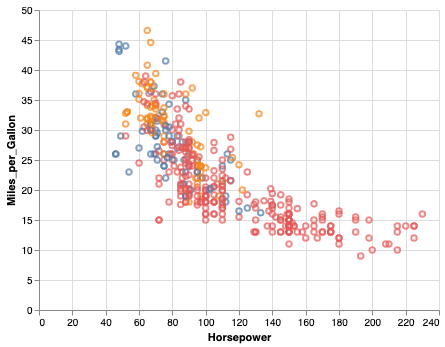

In [50]:
input_dropdown = alt.binding_select(options=['Europe','Japan','USA'])
selection = alt.selection_single(fields=['Origin'], bind=input_dropdown, name='Country of ')
color = alt.condition(selection,
                    alt.Color('Origin:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=color,
    tooltip='Name:N'
).add_selection(
    selection
)

### Using Altair in Flask with React

A group that runs data science hackweeks for the Electrochemical Society has put together a micro example of using the python web framework `flask` with `react` and `Altair` to embed interactive visualizations in your web apps using Python. Flask is a micro web framework written in Python. It is classified as a microframework because it does not require particular tools or libraries. React is a JavaScript library for building user interfaces build and maintained by Facebook.  Altair you should know by now.

The GitHub with the example code is here: https://github.com/ECSHackWeek/flask-altair-react-example along with instructions for setting up the environment and getting started with it.

## In class exercise

Take 20 minutes and using your data from your class project or the pronto data or some other non-trivial dataset and make an interactive visualization.  At the end of this period we will share to the class some of the visualizations you have made with Altair.